# Import Requirements

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import tat_neuro_functions as tnf
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RandomizedLogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Import Clinical Data

In [3]:
# this data has been normalized
clin_df = pd.read_csv('/Users/Greg/Projects/HIV_Neuro_NGS/DataModeling/dataframes/clin_clean_df.csv')
print clin_df.shape
clin_df.head()

(117, 14)


,Age,log10_VL,log10_pVL,CD4,nCD4,CD8,nCD8,TMHDS,Years_seropositive,Exposure_MSM,Exposure_IDU,Exposure_heterosexual,Gender_Male,GDS
0,0.977462,-0.450448,-0.780043,0.286021,0.598424,0.478651,1.112201,-1.571159,0.275913,-0.547723,2.607681,-1.098885,0.776363,1
1,0.977462,-0.450448,-1.021905,1.232499,0.834713,-0.617639,-0.502773,-1.571159,0.592401,1.825742,-0.383482,-1.098885,0.776363,1
2,1.496115,-0.203587,0.316819,0.500897,0.613192,1.574941,0.634923,-0.459311,2.016596,1.825742,-0.383482,-1.098885,0.776363,1
3,2.144432,-0.450448,0.421599,0.219511,1.351597,0.073398,0.829164,-0.644619,-0.198819,-0.547723,-0.383482,-1.098885,0.776363,0
4,0.329145,-0.450448,0.648911,-0.317679,-0.267972,1.593681,1.744872,-0.088694,1.383620,1.825742,2.607681,-1.098885,0.776363,1


# Import Genetic + Clinical Data

In [4]:
# this has not been normalized
sk_df = pd.read_csv('/Users/Greg/Projects/HIV_Neuro_NGS/DataModeling/dataframes/sklearn_preprocessed_df2.csv')
sk_df.head()

,Patient,Visit,Age,Gender,ART,VL,iVL,pVL,CD4,iCD4,...,101F,101P,101S,101T,101W,101Y,101V,log10_VL,log10_iVL,log10_pVL
0,A0001,R09,59.0,Male,on,20.0,987.0,987.0,797.0,400.0,...,0.0,0.000453,0.000356,0.000000,0.000129,0.0,0.001975,1.301030,2.994317,2.994317
1,A0010,R08,59.0,Male,on,20.0,50.0,470.0,1167.0,448.0,...,0.0,0.000000,0.004473,0.001278,0.000000,0.0,0.000000,1.301030,1.698970,2.672098
2,A0012,R02,63.0,Male,on,34.0,2083.0,28550.0,881.0,745.0,...,0.0,0.003399,0.000283,0.000850,0.000000,0.0,0.000142,1.531479,3.318689,4.455606
3,A0013,R09,68.0,Male,on,20.0,144.0,39373.0,771.0,564.0,...,0.0,0.000278,0.003894,0.000278,0.000000,0.0,0.000000,1.301030,2.158362,4.595199
4,A0015,R10,54.0,Male,on,20.0,79074.0,79074.0,561.0,309.0,...,0.0,0.003000,0.000500,0.000400,0.000000,0.0,0.000000,1.301030,4.898034,4.898034


# Select Genetic Data Only

In [5]:
genetic_cols = range(27,len(sk_df.columns)-3)
g_df = tnf.select_dataframe_columns(sk_df, genetic_cols)
print g_df.shape
g_df.head()

(117, 2020)


,1A,1R,1N,1D,1C,1Q,1E,1G,1H,1I,...,101L,101K,101M,101F,101P,101S,101T,101W,101Y,101V
0,0.000213,0.002378,0.00018,0.000049,0.002477,0.000082,0.004051,0.001247,0.0,0.002149,...,0.001036,0.0,0.0,0.0,0.000453,0.000356,0.000000,0.000129,0.0,0.001975
1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.004473,0.001278,0.000000,0.0,0.000000
2,0.000000,0.001640,0.00000,0.000000,0.000547,0.000000,0.000547,0.000547,0.0,0.770366,...,0.003682,0.0,0.0,0.0,0.003399,0.000283,0.000850,0.000000,0.0,0.000142
3,0.000000,0.001629,0.00000,0.000000,0.000000,0.000000,0.001629,0.000000,0.0,0.495114,...,0.002410,0.0,0.0,0.0,0.000278,0.003894,0.000278,0.000000,0.0,0.000000
4,0.000000,0.006211,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.236025,...,0.001600,0.0,0.0,0.0,0.003000,0.000500,0.000400,0.000000,0.0,0.000000


# Append Clinical and Genetic Data

In [6]:
print clin_df.shape
print g_df.shape

df = pd.concat([clin_df, g_df], axis=1)
print df.shape
df.head()

(117, 14)
(117, 2020)
(117, 2034)


,Age,log10_VL,log10_pVL,CD4,nCD4,CD8,nCD8,TMHDS,Years_seropositive,Exposure_MSM,...,101L,101K,101M,101F,101P,101S,101T,101W,101Y,101V
0,0.977462,-0.450448,-0.780043,0.286021,0.598424,0.478651,1.112201,-1.571159,0.275913,-0.547723,...,0.001036,0.0,0.0,0.0,0.000453,0.000356,0.000000,0.000129,0.0,0.001975
1,0.977462,-0.450448,-1.021905,1.232499,0.834713,-0.617639,-0.502773,-1.571159,0.592401,1.825742,...,0.000000,0.0,0.0,0.0,0.000000,0.004473,0.001278,0.000000,0.0,0.000000
2,1.496115,-0.203587,0.316819,0.500897,0.613192,1.574941,0.634923,-0.459311,2.016596,1.825742,...,0.003682,0.0,0.0,0.0,0.003399,0.000283,0.000850,0.000000,0.0,0.000142
3,2.144432,-0.450448,0.421599,0.219511,1.351597,0.073398,0.829164,-0.644619,-0.198819,-0.547723,...,0.002410,0.0,0.0,0.0,0.000278,0.003894,0.000278,0.000000,0.0,0.000000
4,0.329145,-0.450448,0.648911,-0.317679,-0.267972,1.593681,1.744872,-0.088694,1.383620,1.825742,...,0.001600,0.0,0.0,0.0,0.003000,0.000500,0.000400,0.000000,0.0,0.000000


# Features selected from previous models

In [7]:
# features
f1 = ['Age','Years_seropositive','TMHDS','CD4'] # clinical-only
f7 = ['59P', '36V', '40T', '74H', '63E', '12K','23T'] # genetic-oly
f2 = ['59P', '36V']
fc = f1+f7 # current status by traditional metrics
#f4 = ['log10_pVL','nCD4','log10_VL','CD4','TMHDS'] # all 5 traditional features
final_feats = [f1, f7, fc]

In [8]:
#print f1+f2

In [9]:
target = 'GDS'
threshold = 0.5
folds = 5
#features = f4

# record data for different feature sets
AUC1, AUC2 = [], []
PREC1, PREC2 = [], []
REC1, REC2 = [], []
F1, F2 = [], []
TPR1, TPR2 = [], []
FPR1, FPR2 = [], []
COEF1, COEF2 = [], []

for features in final_feats:
    print features

    # ridge model
    ridge_model = LogisticRegression(penalty='l2',solver='liblinear',fit_intercept=True,
                                     C=1, class_weight='balanced', n_jobs=-1)

    # shuffle and analyze the dataframe 100 times ####################################
    auc1, auc2 = [], []
    prec1, prec2 = [], []
    rec1, rec2 = [], []
    f1, f2 = [], []
    tpr1, tpr2 = [], []
    fpr1, fpr2 = [], []
    coef1, coef2 = [], []

    for _ in range(100):

        # shuffle the dataframe
        df_shuffled = tnf.shuffle_dataframe(df)

        # select 100 samples from the shuffled dataframe
        # prepare the dataframe for sklearn
        X_df, y = tnf.run_genetic_preparation_pipeline(df_shuffled[:100], features, target, threshold)

        # run k-fold cross validation
        ridge_metrics = tnf.get_CV_metrics(ridge_model, X_df[features], y, folds)

        # append data for each random sample 
        # ridge metrics
        auc2.append(np.mean(ridge_metrics['AUC']))
        prec2.append(np.mean(ridge_metrics['Precision']))
        rec2.append(np.mean(ridge_metrics['Recall']))
        f2.append(np.mean(ridge_metrics['F1']))
        tpr2.append(ridge_metrics['meanTPR'])
        fpr2.append(ridge_metrics['meanFPR'])
        coef2.append(ridge_metrics['Coef'])

    #append results for each model
    AUC2.append(auc2)
    PREC2.append(prec2)
    REC2.append(rec2)
    F2.append(f2)
    TPR2.append(tpr2) 
    FPR2.append(fpr2) 
    COEF2.append(coef2)

['Age', 'Years_seropositive', 'TMHDS', 'CD4']
['59P', '36V', '40T', '74H', '63E', '12K', '23T']
['Age', 'Years_seropositive', 'TMHDS', 'CD4', '59P', '36V', '40T', '74H', '63E', '12K', '23T']


0.7 0.03
0.66 0.04
0.74 0.04


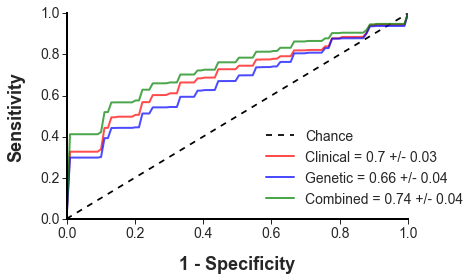

In [10]:
# iterate through the combinations of features

fig,ax=plt.subplots(figsize=(6,4))

label_names = ['Clinical','Genetic','Combined']

# formatting
ax.tick_params(axis='x', labelsize=14, length=5)
ax.tick_params(axis='y', labelsize=14, length=5)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.set_xlabel('1 - Specificity', size=18, labelpad=15, weight='bold')
ax.set_ylabel('Sensitivity', size=18, labelpad=15, weight='bold')
ax.set_axis_bgcolor('white')
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)
ax.ticklabel_format(size=20)
ax.plot([0, 1], [0, 1], ls='--', color='black', label='Chance')
clrs = ['red','blue','green','purple','orange','deeppink','aqua','gold','lime','sienna']

for j in range(len(final_feats)):
    # returns a list of arrays
    f = FPR2[j]
    t = TPR2[j]
    a = str(round(np.mean(AUC2[j]),2))
    
    b = str(round(np.std(AUC2[j]),2))
    print a, b
    
    # initialize a mean TRP and FPR
    X = np.zeros(len(f[0]))
    Y = np.zeros(len(t[0]))
    # iterate through each randomization
    for i in range(len(t)):
        X = X + f[i]
        Y = Y + t[i]
    X = X/len(t)
    Y = Y/len(t)
    #ax.plot(X, Y, color=clrs[j], ls='-', label='F'+str(j+1)+' = '+a, linewidth=2, alpha=0.7)
    ax.plot(X, Y, color=clrs[j], ls='-', label=label_names[j]+' = '+a+' +/- '+b, linewidth=2, alpha=0.7)

fig.tight_layout()
plt.legend(bbox_to_anchor=[1.2, 0.5],ncol=1,fontsize=14)
plt.show()


savepath = '/Users/Greg/Projects/HIV_Neuro_NGS/Figures/combined_roc_plot.png'
fig.savefig(savepath,dpi=300, bbox_inches='tight')

# Coefficients

In [13]:
coeff_dict_list = []

i=0
for feature_group in COEF2:
    #print len(feature_group)
    cv_mean_list = []
    for cv_group in feature_group:
        cv_mean = np.mean(cv_group,0)
        #print len(cv_group), cv_mean
        cv_mean_list.append(cv_mean)
    #print len(cv_mean_list), len(cv_mean_list[0][0])
    F = final_feats[i]
    S = np.mean(cv_mean_list,0)[0]
    Z = zip(F,S)
    coeff_dict_list.append(dict(Z))
    i+=1

X = []
VARS = ['Age', 'Years_seropositive', 'TMHDS', 'CD4','59P', '36V', '40T', '74H',
        '63E', '12K', '23T']

for A in coeff_dict_list:
    x = []
    for V in VARS:
        if V in A.keys():
            x.append(A[V])
        else:
            x.append(np.nan)
    X.append(x)

coeff_df = pd.DataFrame(X)
coeff_df.columns = VARS
coeff_df.T

,0,1,2
Age,-0.435702,NaN,-0.445750
Years_seropositive,0.335080,NaN,0.327039
TMHDS,-0.582534,NaN,-0.564407
CD4,0.541664,NaN,0.528327
59P,NaN,0.659971,0.631466
36V,NaN,-0.856805,-1.007435
40T,NaN,-0.502254,-0.249130
74H,NaN,0.435071,0.408263
63E,NaN,-0.419917,-0.203588
12K,NaN,0.957188,0.987124


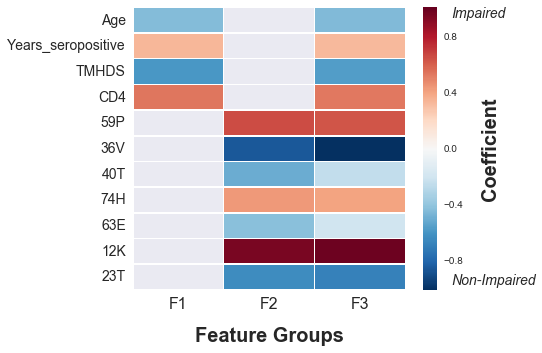

In [18]:
fig,ax = plt.subplots(figsize=(7,5))
ax = sns.heatmap(coeff_df.T, linewidths=.5)
#VARS = ['30C', '31C','59P', '36V', '40T', '74H', '63E', '12K', '23T', '74L', '53R', '71K', '29K', '97D', '93E']
ax.set_yticklabels(VARS[::-1],fontsize=14, rotation=0)
ax.set_xticklabels(['F1', 'F2', 'F3'], fontsize=16)
ax.set_xlabel('Feature Groups', labelpad=15, fontsize=20, weight='bold')
ax.yaxis.set_label_position('right')
ax.set_ylabel('Coefficient', fontsize=20, weight='bold', labelpad=75)

ax.text(3.5,0.2,'Non-Impaired',fontsize=14,fontstyle='italic')
ax.text(3.5,10.6,'Impaired',fontsize=14,fontstyle='italic')
fig.tight_layout()
plt.show()

savepath = '/Users/Greg/Projects/HIV_Neuro_NGS/Figures/finalmodel_roc_coeff.png'
fig.savefig(savepath,dpi=300, bbox_inches='tight')